        step  customer  age  gender  zipcodeOri  merchant  zipMerchant  \
0          0       210    4       2       28007        30        28007   
1          0      2753    2       2       28007        30        28007   
2          0      2285    4       1       28007        18        28007   
3          0      1650    3       2       28007        30        28007   
4          0      3585    5       2       28007        30        28007   
...      ...       ...  ...     ...         ...       ...          ...   
594638   179      1639    3       1       28007        18        28007   
594639   179      3369    4       1       28007        18        28007   
594640   179       529    2       1       28007        31        28007   
594641   179      1083    5       2       28007        18        28007   
594642   179      3304    4       1       28007        18        28007   

        category  amount  fraud  
0             12    4.55      0  
1             12   39.68      0  
2        

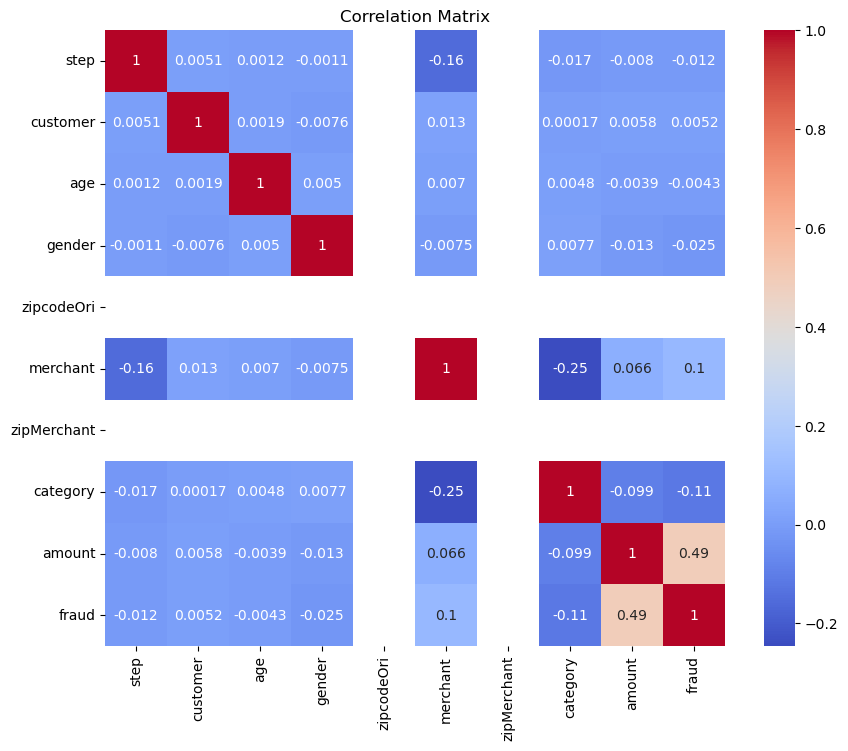

In [184]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Загрузка данных из файла
data = pd.read_csv("C:/Users/user/Desktop/fraud_dataset.csv", delimiter='|')
data.drop (columns=data.columns [0], axis= 1 , inplace= True )
# Закодирование строковых значений
for column in data.columns:
    if data[column].dtype == 'object':  # Проверка, является ли столбец строковым
        data[column] = label_encoder.fit_transform(data[column])
data['zipcodeOri'] = data['zipcodeOri'].replace(0, 28007)
data['zipMerchant'] = data['zipMerchant'].replace(0,28007)

# Вывод обновленных данных
print(data)

# Вычисление корреляции между признаками
correlation_matrix = data.corr()
print(correlation_matrix)
# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv("C:/Users/user/Desktop/fraud_dataset.csv", delimiter='|')

# Предварительная обработка данных

# Удаление ненужных столбцов
data = data.drop(['step', 'customer', 'zipcodeOri', 'merchant', 'zipMerchant'], axis=1)

# Кодирование категориальных признаков
categorical_features = ['age', 'gender', 'category']
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Разделение на признаки и метки
X = data_encoded.drop('fraud', axis=1)
y = data_encoded['fraud']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight={0: 1, 1: 10})

# Обучение модели случайного леса
model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = X.columns

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred))

                             Feature  Importance
1                             amount    0.477584
26      category_'es_transportation'    0.165968
24       category_'es_sportsandtoys'    0.101147
0                         Unnamed: 0    0.093495
18              category_'es_health'    0.033959
17                category_'es_food'    0.025666
22             category_'es_leisure'    0.020422
20       category_'es_hotelservices'    0.017292
27              category_'es_travel'    0.016963
28   category_'es_wellnessandbeauty'    0.006317
19                category_'es_home'    0.005096
23       category_'es_otherservices'    0.004495
16             category_'es_fashion'    0.003872
21               category_'es_hyper'    0.003740
14  category_'es_barsandrestaurants'    0.002892
25                category_'es_tech'    0.002810
11                        gender_'F'    0.002628
4                            age_'2'    0.002449
6                            age_'4'    0.002403
5                   